In [1]:
import sys
!{sys.executable} -m pip install category_encoders

  Using cached category_encoders-2.8.1-py3-none-any.whl.metadata (7.9 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
  Using cached statsmodels-0.14.5-cp311-cp311-win_amd64.whl.metadata (9.8 kB)
Using cached category_encoders-2.8.1-py3-none-any.whl (85 kB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB 653.6 kB/s eta 0:00:15
    --------------------------------------- 0.1/9.6 MB 1.0 MB/s eta 0:00:10
    --------------------------------------- 0.1/9.6 MB 847.9 kB/s eta 0:00:12
    --------------------------------------- 0.2/9.6 MB 827.9 kB/s eta 0:00:12
    --------------------------------------- 0.2/9.6 MB 827.9 kB/s eta 0:00:12
    --------------------------------------- 0.2/9.6 MB 758.5 kB/s eta 0:00:13
   - -------------------------------------- 0.3/9.6 MB 863.3 

In [9]:
import sys
!{sys.executable} -m pip install liac-arff

  Using cached liac_arff-2.5.0-py3-none-any.whl


In [2]:
import arff
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from category_encoders import TargetEncoder

In [197]:
with open(r"I:\Mihini\SLIIT\Y2S1\AIMl-Project\Student-depression\depression_dataset.arff", 'r') as f:
    dataset = arff.load(f)

In [198]:
df = pd.DataFrame(dataset['data'], columns=[a[0] for a in dataset['attributes']])

In [199]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2.0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
1,8.0,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0.0
2,26.0,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0.0
3,30.0,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1.0
4,32.0,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0.0


Text(0.5, 1.0, 'Gender Distribution')

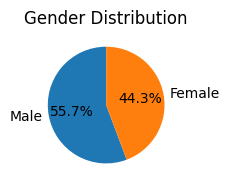

In [200]:
plt.subplot(2, 3, 1)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

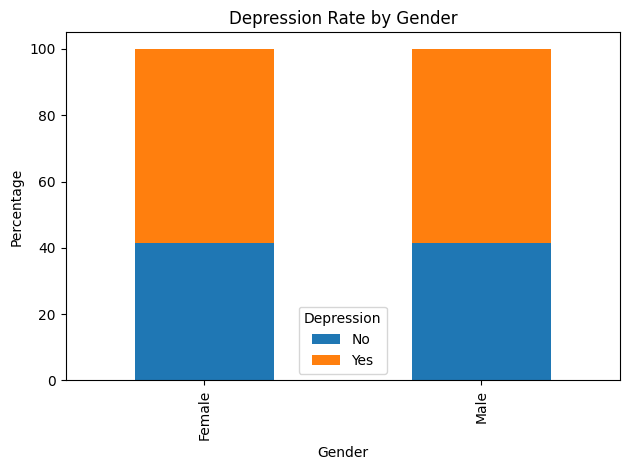

In [201]:
gender_depression = pd.crosstab(df['Gender'], df['Depression'], normalize='index') * 100
gender_depression.plot(kind='bar', stacked=True)
plt.title('Depression Rate by Gender')
plt.ylabel('Percentage')
plt.legend(title='Depression', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

In [202]:
print(df['Gender'].value_counts())

Gender
Male      15547
Female    12354
Name: count, dtype: int64


In [203]:
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

Text(0.5, 0, 'Number of Students')

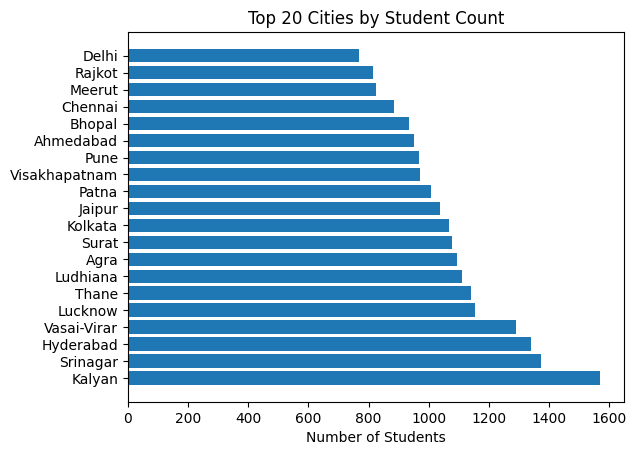

In [204]:
city_counts = df['City'].value_counts().head(20)
plt.barh(range(len(city_counts)), city_counts.values)
plt.yticks(range(len(city_counts)), city_counts.index)
plt.title('Top 20 Cities by Student Count')
plt.xlabel('Number of Students')


Text(0, 0.5, 'Count')

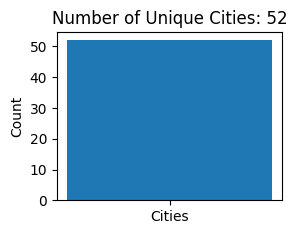

In [205]:
plt.subplot(2, 2, 2)
city_cardinality = df['City'].nunique()
plt.bar(['Cities'], [city_cardinality])
plt.title(f'Number of Unique Cities: {city_cardinality}')
plt.ylabel('Count')

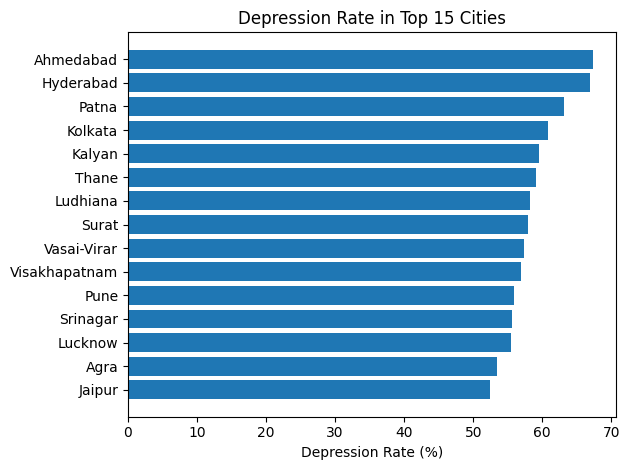

In [206]:
top_cities = df['City'].value_counts().head(15).index
city_depression = df[df['City'].isin(top_cities)].groupby('City')['Depression'].mean().sort_values()
plt.barh(range(len(city_depression)), city_depression.values * 100)
plt.yticks(range(len(city_depression)), city_depression.index)
plt.title('Depression Rate in Top 15 Cities')
plt.xlabel('Depression Rate (%)')

plt.tight_layout()
plt.show()

In [207]:
print(f"Number of unique cities: {df['City'].nunique()}")

Number of unique cities: 52


In [208]:
te_city = TargetEncoder()
df['City'] = te_city.fit_transform(df['City'], df['Depression'])

Text(0.5, 0, 'Count')

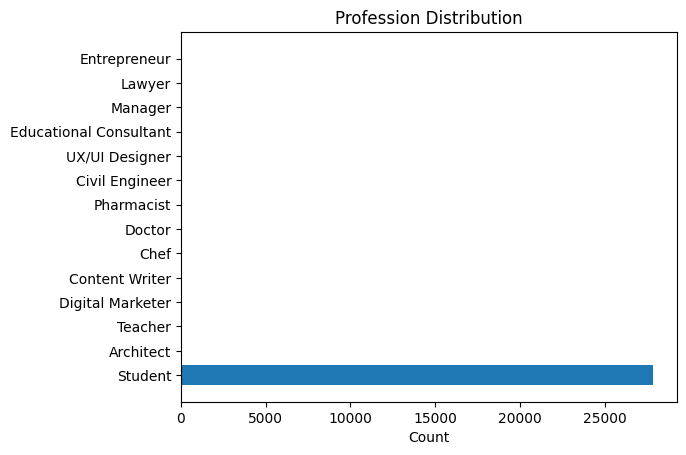

In [209]:

profession_counts = df['Profession'].value_counts()
plt.barh(range(len(profession_counts)), profession_counts.values)
plt.yticks(range(len(profession_counts)), profession_counts.index)
plt.title('Profession Distribution')
plt.xlabel('Count')

Text(0.5, 1.0, 'Rare vs Common Professions')

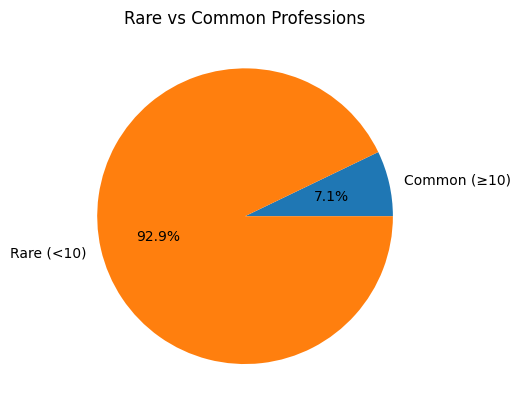

In [210]:
rare_threshold = 10
rare_count = (profession_counts < rare_threshold).sum()
common_count = (profession_counts >= rare_threshold).sum()
plt.pie([common_count, rare_count], labels=[f'Common (≥{rare_threshold})', f'Rare (<{rare_threshold})'], autopct='%1.1f%%')
plt.title('Rare vs Common Professions')

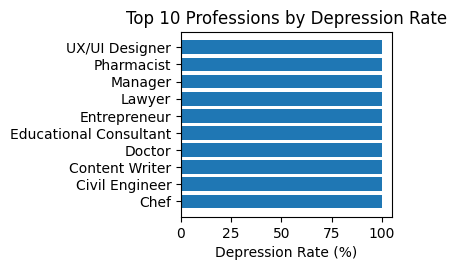

In [211]:
plt.subplot(2, 2, 3)
profession_depression = df.groupby('Profession')['Depression'].mean().sort_values(ascending=False).head(10)
plt.barh(range(len(profession_depression)), profession_depression.values * 100)
plt.yticks(range(len(profession_depression)), profession_depression.index)
plt.title('Top 10 Professions by Depression Rate')
plt.xlabel('Depression Rate (%)')


plt.tight_layout()
plt.show()

In [212]:
profession_counts = df['Profession'].value_counts()
print(profession_counts)
print("-------------------------")
print("Profession Statistics:")
print(f"Total unique professions: {df['Profession'].nunique()}")
print(f"Professions with <10 occurrences: {(profession_counts < 10).sum()}")

Profession
Student                   27870
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64
-------------------------
Profession Statistics:
Total unique professions: 14
Professions with <10 occurrences: 13


In [213]:
prof_counts = df['Profession'].value_counts()

rare_prof = prof_counts[prof_counts < 10].index
df['Profession'] = LabelEncoder().fit_transform(df['Profession'].apply(lambda x: 'Other' if x in rare_prof else x))

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Less than 5 hours'),
  Text(1, 0, '7-8 hours'),
  Text(2, 0, '5-6 hours'),
  Text(3, 0, 'More than 8 hours'),
  Text(4, 0, 'Others')])

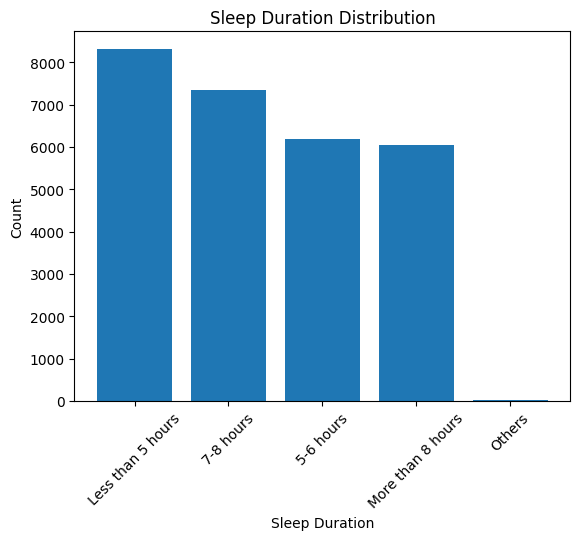

In [214]:
sleep_counts = df['Sleep Duration'].value_counts()
plt.bar(sleep_counts.index, sleep_counts.values)
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)

Text(0, 0.5, 'Depression Rate (%)')

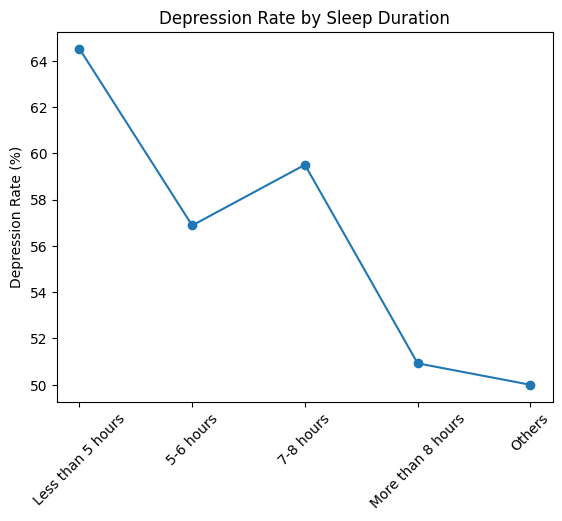

In [215]:
sleep_depression = df.groupby('Sleep Duration')['Depression'].mean().sort_index()
sleep_order = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours', 'Others']
sleep_depression = sleep_depression.reindex(sleep_order)
plt.plot(range(len(sleep_depression)), sleep_depression.values * 100, marker='o')
plt.xticks(range(len(sleep_depression)), sleep_depression.index, rotation=45)
plt.title('Depression Rate by Sleep Duration')
plt.ylabel('Depression Rate (%)')

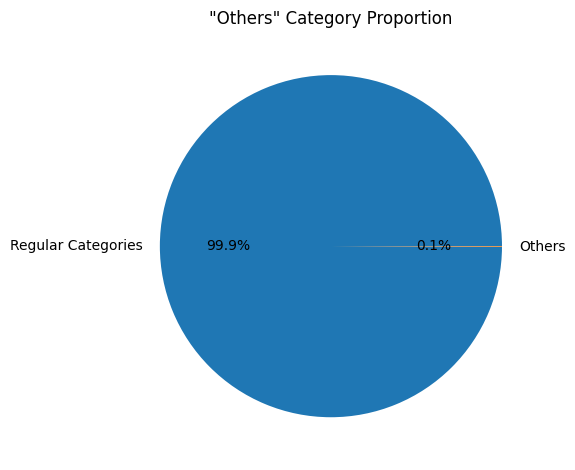

In [216]:
others_count = (df['Sleep Duration'] == 'Others').sum()
plt.pie([len(df) - others_count, others_count], labels=['Regular Categories', 'Others'], autopct='%1.1f%%')
plt.title('"Others" Category Proportion')

plt.tight_layout()
plt.show()

In [217]:
print(df['Sleep Duration'].unique())
print(df['Sleep Duration'].value_counts())
print(f"\nNatural ordering: Less than 5 hours → 5-6 hours → 7-8 hours → More than 8 hours")

['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']
Sleep Duration
Less than 5 hours    8310
7-8 hours            7346
5-6 hours            6183
More than 8 hours    6044
Others                 18
Name: count, dtype: int64

Natural ordering: Less than 5 hours → 5-6 hours → 7-8 hours → More than 8 hours


In [218]:
df['Sleep Duration'] = df['Sleep Duration'].replace('Others', 'More than 8 hours')

sleep_order = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']
ordinal_sleep = OrdinalEncoder(categories=[sleep_order])
df['Sleep Duration'] = ordinal_sleep.fit_transform(df[['Sleep Duration']])

Text(0, 0.5, 'Count')

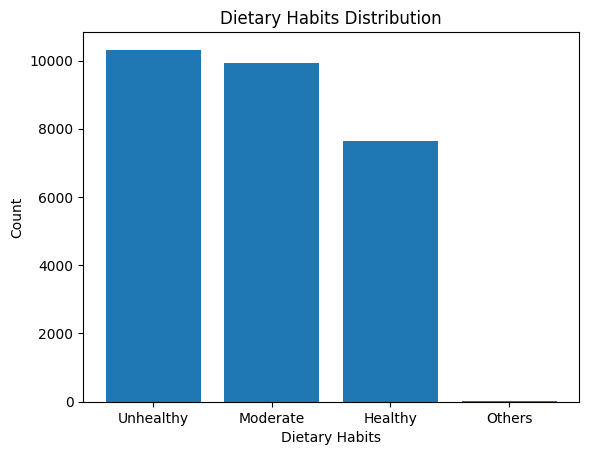

In [219]:
diet_counts = df['Dietary Habits'].value_counts()
plt.bar(diet_counts.index, diet_counts.values)
plt.title('Dietary Habits Distribution')
plt.xlabel('Dietary Habits')
plt.ylabel('Count')

Text(0, 0.5, 'Depression Rate (%)')

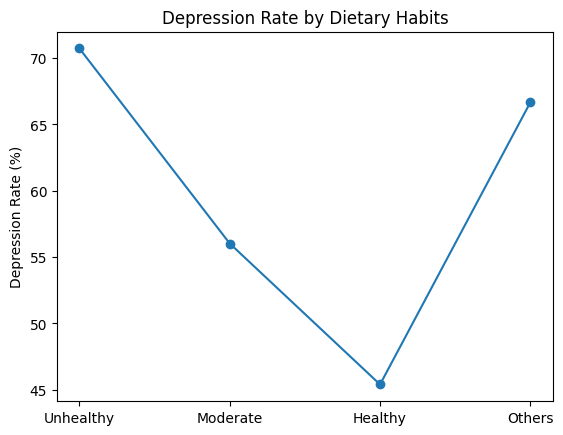

In [220]:
diet_depression = df.groupby('Dietary Habits')['Depression'].mean().sort_index()
diet_order = ['Unhealthy', 'Moderate', 'Healthy', 'Others']
diet_depression = diet_depression.reindex([d for d in diet_order if d in diet_depression.index])
plt.plot(range(len(diet_depression)), diet_depression.values * 100, marker='o')
plt.xticks(range(len(diet_depression)), diet_depression.index)
plt.title('Depression Rate by Dietary Habits')
plt.ylabel('Depression Rate (%)')

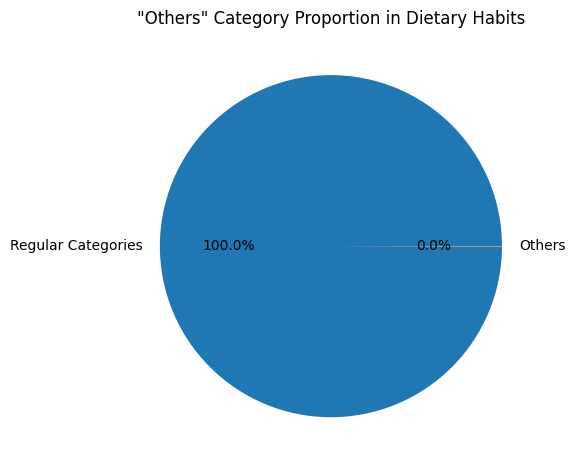

In [221]:
others_count = (df['Dietary Habits'] == 'Others').sum()
plt.pie([len(df) - others_count, others_count], labels=['Regular Categories', 'Others'], autopct='%1.1f%%')
plt.title('"Others" Category Proportion in Dietary Habits')

plt.tight_layout()
plt.show()

In [222]:
print("Dietary Habits Analysis:")
print(df['Dietary Habits'].value_counts())
print(f"\nNatural ordering: Unhealthy → Moderate → Healthy")

Dietary Habits Analysis:
Dietary Habits
Unhealthy    10317
Moderate      9921
Healthy       7651
Others          12
Name: count, dtype: int64

Natural ordering: Unhealthy → Moderate → Healthy


In [223]:
df['Dietary Habits'] = df['Dietary Habits'].replace('Others', 'Moderate')

diet_order = ['Unhealthy', 'Moderate', 'Healthy']
ordinal_diet = OrdinalEncoder(categories=[diet_order])
df['Dietary Habits'] = ordinal_diet.fit_transform(df[['Dietary Habits']])

Text(0.5, 0, 'Number of Students')

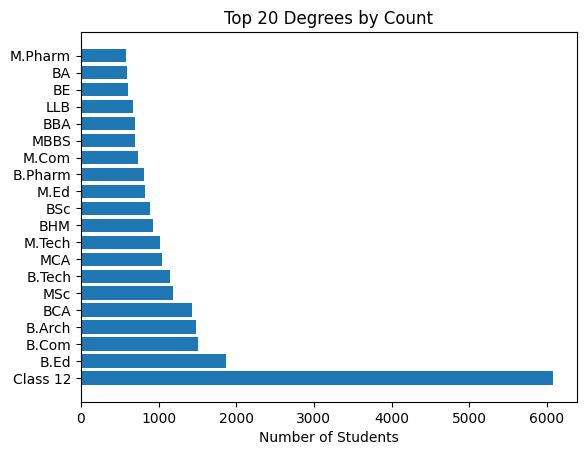

In [224]:
degree_counts = df['Degree'].value_counts().head(20)
plt.barh(range(len(degree_counts)), degree_counts.values)
plt.yticks(range(len(degree_counts)), degree_counts.index)
plt.title('Top 20 Degrees by Count')
plt.xlabel('Number of Students')

Text(0, 0.5, 'Count')

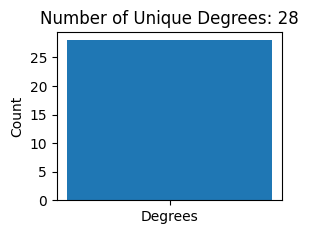

In [225]:
plt.subplot(2, 2, 2)
degree_cardinality = df['Degree'].nunique()
plt.bar(['Degrees'], [degree_cardinality])
plt.title(f'Number of Unique Degrees: {degree_cardinality}')
plt.ylabel('Count')

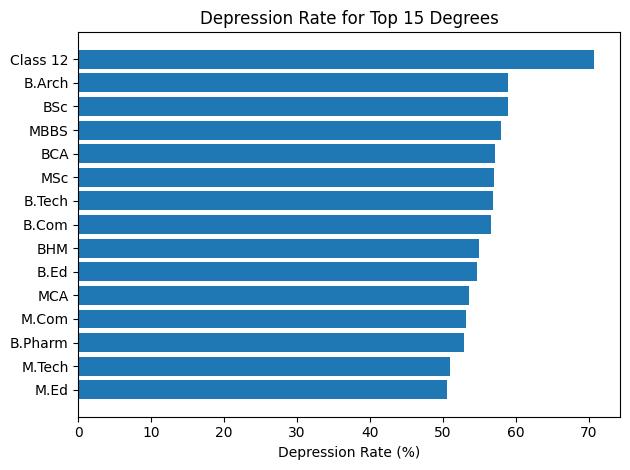

In [226]:
top_degrees = df['Degree'].value_counts().head(15).index
degree_depression = df[df['Degree'].isin(top_degrees)].groupby('Degree')['Depression'].mean().sort_values()
plt.barh(range(len(degree_depression)), degree_depression.values * 100)
plt.yticks(range(len(degree_depression)), degree_depression.index)
plt.title('Depression Rate for Top 15 Degrees')
plt.xlabel('Depression Rate (%)')

plt.tight_layout()
plt.show()

In [227]:
print(f"Number of unique degrees: {df['Degree'].nunique()}")

Number of unique degrees: 28


In [228]:
te_degree = TargetEncoder()
df['Degree'] = te_degree.fit_transform(df['Degree'], df['Depression'])

Text(0.5, 1.0, 'Suicidal Thoughts Distribution')

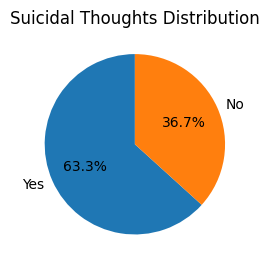

In [229]:
plt.subplot(1, 2, 1)
suicide_counts = df['Have you ever had suicidal thoughts ?'].value_counts()
plt.pie(suicide_counts.values, labels=suicide_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Suicidal Thoughts Distribution')

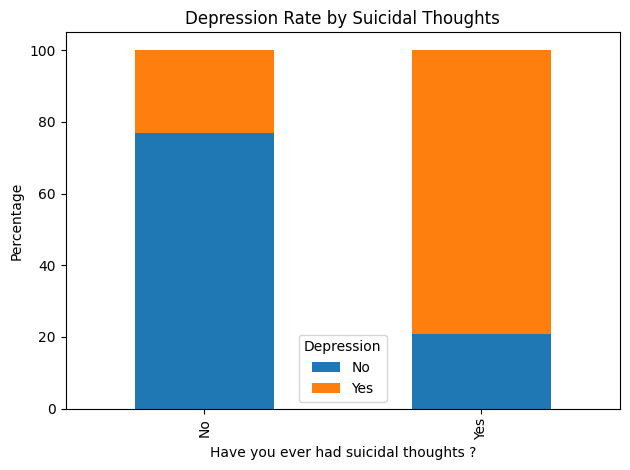

In [230]:
suicide_depression = pd.crosstab(df['Have you ever had suicidal thoughts ?'], 
                                df['Depression'], normalize='index') * 100
suicide_depression.plot(kind='bar', stacked=True)
plt.title('Depression Rate by Suicidal Thoughts')
plt.ylabel('Percentage')
plt.legend(title='Depression', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

In [231]:
print("Suicidal Thoughts Analysis:")
print(df['Have you ever had suicidal thoughts ?'].value_counts())

Suicidal Thoughts Analysis:
Have you ever had suicidal thoughts ?
Yes    17656
No     10245
Name: count, dtype: int64


In [232]:
le_suicide = LabelEncoder()
df['Have you ever had suicidal thoughts ?'] = le_suicide.fit_transform(df['Have you ever had suicidal thoughts ?'])

Text(0.5, 1.0, 'Family History of Mental Illness Distribution')

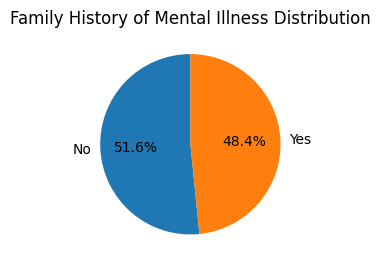

In [233]:
plt.subplot(1, 2, 1)
family_counts = df['Family History of Mental Illness'].value_counts()
plt.pie(family_counts.values, labels=family_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Family History of Mental Illness Distribution')


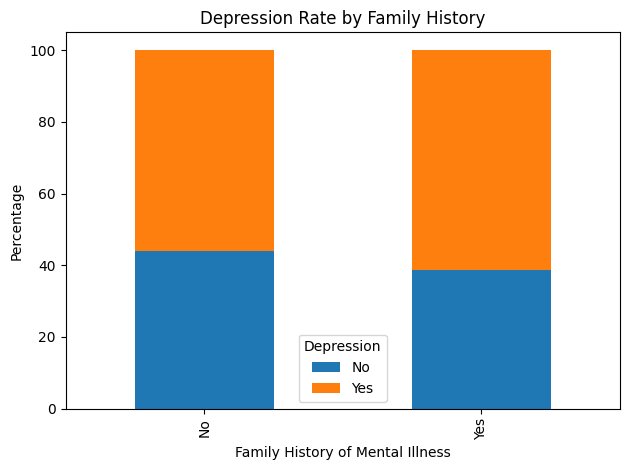

In [234]:
family_depression = pd.crosstab(df['Family History of Mental Illness'], 
                               df['Depression'], normalize='index') * 100
family_depression.plot(kind='bar', stacked=True)
plt.title('Depression Rate by Family History')
plt.ylabel('Percentage')
plt.legend(title='Depression', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

In [235]:
print("Family History Analysis:")
print(df['Family History of Mental Illness'].value_counts())

Family History Analysis:
Family History of Mental Illness
No     14398
Yes    13503
Name: count, dtype: int64


In [236]:
le_family = LabelEncoder()
df['Family History of Mental Illness'] = le_family.fit_transform(df['Family History of Mental Illness'])

In [237]:
encoded_columns = [
    'Gender', 'City', 'Profession', 'Sleep Duration', 
    'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness'
]

print(df[encoded_columns + ['Depression']].head())

   Gender      City  Profession  Sleep Duration  Dietary Habits    Degree  \
0       1  0.569659           1             1.0             2.0  0.528395   
1       0  0.608866           1             1.0             1.0  0.588964   
2       1  0.556122           1             0.0             2.0  0.535000   
3       0  0.531387           1             2.0             1.0  0.571528   
4       0  0.524131           1             1.0             1.0  0.509785   

   Have you ever had suicidal thoughts ?  Family History of Mental Illness  \
0                                      1                                 0   
1                                      0                                 1   
2                                      0                                 1   
3                                      1                                 1   
4                                      1                                 0   

   Depression  
0         1.0  
1         0.0  
2         0.0  
3   

In [238]:
print(df.dtypes)

id                                       float64
Gender                                     int32
Age                                      float64
City                                     float64
Profession                                 int32
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                           float64
Dietary Habits                           float64
Degree                                   float64
Have you ever had suicidal thoughts ?      int32
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness           int32
Depression                               float64
dtype: object


In [239]:
df.head(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2.0,1,33.0,0.569659,1,5.0,0.0,8.97,2.0,0.0,1.0,2.0,0.528395,1,3.0,1.0,0,1.0
1,8.0,0,24.0,0.608866,1,2.0,0.0,5.90,5.0,0.0,1.0,1.0,0.588964,0,3.0,2.0,1,0.0
2,26.0,1,31.0,0.556122,1,3.0,0.0,7.03,5.0,0.0,0.0,2.0,0.535000,0,9.0,1.0,1,0.0
3,30.0,0,28.0,0.531387,1,3.0,0.0,5.59,2.0,0.0,2.0,1.0,0.571528,1,4.0,5.0,1,1.0
4,32.0,0,25.0,0.524131,1,4.0,0.0,8.13,3.0,0.0,1.0,1.0,0.509785,1,1.0,1.0,0,0.0
